In [35]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR+
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [36]:
df = pd.read_csv('domain_related_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oem                  8231 non-null   object 
 1   ownerNo              8231 non-null   float64
 2   transmission         8231 non-null   object 
 3   km                   8231 non-null   float64
 4   modelYear            8231 non-null   float64
 5   Fuel Type            8231 non-null   object 
 6   Engine Displacement  8231 non-null   float64
 7   Mileage              8231 non-null   float64
 8   Max Power            8231 non-null   float64
 9   model                8231 non-null   object 
 10  Gear Box             8231 non-null   float64
 11  bt                   8231 non-null   object 
 12  price                8231 non-null   float64
dtypes: float64(8), object(5)
memory usage: 836.1+ KB


In [37]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['oem', 'transmission', 'Fuel Type', 'model', 'bt'], dtype='object')

In [38]:
cont_cols = df.select_dtypes(include=['float64', 'int64']).columns
cont_cols

Index(['ownerNo', 'km', 'modelYear', 'Engine Displacement', 'Mileage',
       'Max Power', 'Gear Box', 'price'],
      dtype='object')

In [39]:
encoder = LabelEncoder()
encoded_mappings = {}

for i in df.select_dtypes(include="object").columns:
  df[i] = encoder.fit_transform(df[i])
  encoded_mappings[i] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in encoded_mappings.items():
    print(f"Encoded values for '{col}':")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")
    print()

joblib.dump(encoded_mappings, "encoded_mappings.pkl")

Encoded values for 'oem':
  Audi -> 0
  BMW -> 1
  Chevrolet -> 2
  Citroen -> 3
  Datsun -> 4
  Fiat -> 5
  Ford -> 6
  Hindustan -> 7
  Honda -> 8
  Hyundai -> 9
  Isuzu -> 10
  Jaguar -> 11
  Jeep -> 12
  Kia -> 13
  Land Rover -> 14
  Lexus -> 15
  MG -> 16
  Mahindra -> 17
  Maruti -> 18
  Mercedes-Benz -> 19
  Mini -> 20
  Mitsubishi -> 21
  Nissan -> 22
  Opel -> 23
  Porsche -> 24
  Renault -> 25
  Skoda -> 26
  Tata -> 27
  Toyota -> 28
  Volkswagen -> 29
  Volvo -> 30

Encoded values for 'transmission':
  Automatic -> 0
  Manual -> 1

Encoded values for 'Fuel Type':
  CNG -> 0
  Diesel -> 1
  Electric -> 2
  LPG -> 3
  Petrol -> 4

Encoded values for 'model':
  Ambassador -> 0
  Audi A3 -> 1
  Audi A3 cabriolet -> 2
  Audi A4 -> 3
  Audi A6 -> 4
  Audi A8 -> 5
  Audi Q2 -> 6
  Audi Q3 -> 7
  Audi Q3 Sportback -> 8
  Audi Q5 -> 9
  Audi Q7 -> 10
  Audi S5 Sportback -> 11
  BMW 1 Series -> 12
  BMW 2 Series -> 13
  BMW 3 Series -> 14
  BMW 3 Series GT -> 15
  BMW 3 Series Gran 

['encoded_mappings.pkl']

In [40]:
# import json

# # Save the mappings to a JSON file
# with open("encoded_mappings.json", "w") as f:
#     json.dump(encoded_mappings, f)

# # To load it back later
# with open("encoded_mappings.json", "r") as f:
#     loaded_mappings = json.load(f)

# print(loaded_mappings)

In [41]:
X = df.drop(columns=['price'])
y = df['price']

##### Step 1 -- Model Selection

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models (same as before)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Store evaluation metrics for each model
evaluation_results = []

# Iterate over models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_preds = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Compute metrics
    train_mae = mean_absolute_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    # Append metrics to results
    evaluation_results.append({
        'Model': name,
        'Train MAE': train_mae,
        'Train R2 Score': train_r2,
        'Test MAE' : test_mae,
        'Test R2 Score' : test_r2
    })

# Convert results to a DataFrame for better readability
evaluation_df = pd.DataFrame(evaluation_results)

In [43]:
evaluation_df

,Model,Train MAE,Train R2 Score,Test MAE,Test R2 Score
0,Linear Regression,138101.442729,0.858343,134316.683293,0.862079
1,Ridge Regression,138100.175259,0.858343,134314.850724,0.862080
2,Lasso Regression,138101.317130,0.858343,134316.542354,0.862079
3,ElasticNet,141417.450666,0.847697,138555.490271,0.852948
4,Support Vector Regression (SVR),368744.338540,-0.092375,365642.487841,-0.104739
5,K-Nearest Neighbors (KNN),167871.970656,0.756396,206806.268245,0.628951
6,Random Forest,31475.408130,0.990313,80947.136892,0.936170
7,Gradient Boosting,87746.468467,0.935549,91138.413883,0.925405
8,XGBoost,45384.071291,0.983583,78574.941587,0.943043


In [ ]:
""" conclusion from step 1 - 
 Model Evaluation Summary - Based on the evaluation metrics (Mean Absolute Error (MAE) and R² Score): - **Random Forest** and **XGBoost** outperformed other models: - Random Forest: MAE = 82292.93, R² = 0.933 , - XGBoost: MAE = 76691.87, R² = 0.94 for testing data. 
                            Both models demonstrated significantly better accuracy and lower error compared to other algorithms.
 Final Decision - The **Random Forest** and **XGBoost** models will be taken to the next stage of refinement. """

##### Step 2 - Hyperparameter tuning

In [ ]:
""" Hyperparameter Tuning: Utilize `RandomizedSearchCV` to optimize the performance of these two models. 
This approach ensures efficient search across a wide range of hyperparameters while saving computational time compared to `GridSearchCV`. """

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search_xgb.best_params_)
print("Best R2 Score:", random_search_xgb.best_score_)

# Evaluate the best model on the test set
best_model_xgb = random_search_xgb.best_estimator_
y_pred = best_model_xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
print(f"MAE: {xgb_mae}, R2 Score: {xgb_r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best R2 Score: 0.940662103784741
MAE: 78056.01491585078, R2 Score: 0.9449313331152163


In [45]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'], 
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='r2',  
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1 
)

# Fit the random search to the data
random_search_rf.fit(X_train, y_train)

# Extract the best parameters and the best score
print("Best Parameters:", random_search_rf.best_params_)
print("Best Cross-Validated R2 Score:", random_search_rf.best_score_)

# Evaluate the best model on the test set
best_model_rf = random_search_rf.best_estimator_
y_pred = best_model_rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Test Set Performance:\n MAE: {rf_mae}, R2 Score: {rf_r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Cross-Validated R2 Score: 0.9376513245923153
Test Set Performance:
 MAE: 77653.8135998881, R2 Score: 0.9436359348223973


In [46]:
results = {
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [rf_mae, xgb_mae],
    'R2 Score': [rf_r2, xgb_r2]
}
results_df = pd.DataFrame(results)
print(results_df)

           Model           MAE  R2 Score
0  Random Forest  77653.813600  0.943636
1        XGBoost  78056.014916  0.944931


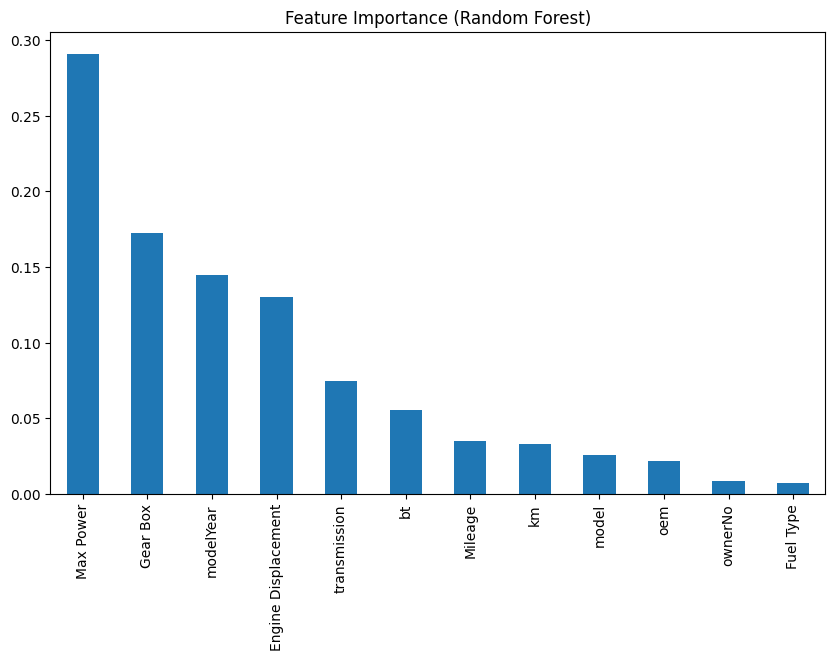

In [47]:
# Feature importance for Random Forest
rf_importance = pd.Series(best_model_rf.feature_importances_, index=X.columns)
rf_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (Random Forest)', figsize=(10, 6))
plt.show()


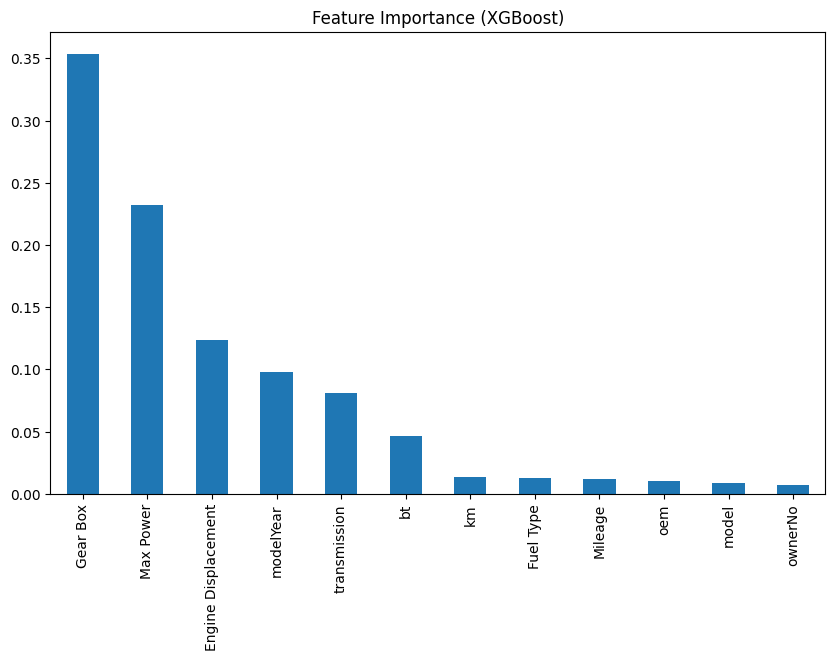

In [48]:
# Feature importance for XGBoost
xgb_importance = pd.Series(random_search_xgb.best_estimator_.feature_importances_, index=X.columns)
xgb_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (XGBoost)', figsize=(10, 6))
plt.show()

#####  Step 3 - deploy model using best params

In [49]:
# Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
# Best R² Score: 0.939587569050736
# MAE: 78563.06714386005, R² Score: 0.9432406579922457

best_xgb_params = random_search_xgb.best_params_

best_xgb_model = XGBRegressor(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    random_state=42
)

best_xgb_model.fit(X_train, y_train)

y_train_pred_xgb = best_xgb_model.predict(X_train)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

y_test_pred_xgb = best_xgb_model.predict(X_test)

mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

best_xgb_params_results = {
    'Model': ['XGBoost'],
    'Train MAE': [mae_train_xgb],
    'Train R2 Score': [r2_train_xgb],
    'Test MAE' : [mae_test_xgb],
    'Test R2 Score' : [r2_test_xgb]
}
result = pd.DataFrame(best_xgb_params_results)
print(result)


     Model     Train MAE  Train R2 Score      Test MAE  Test R2 Score
0  XGBoost  64220.167122        0.966864  78084.436691       0.945306


In [50]:
# Save the model
joblib.dump(best_xgb_model, 'carprice_prediction_ml_model.pkl')

['carprice_prediction_ml_model.pkl']